# Preamble

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

os.environ['JAX_PLATFORM_NAME'] = "cpu"
os.environ['JAX_PLATFORMS'] = "cpu"

In [2]:
import jax.numpy as jnp
import jax

import numpy as onp

import matplotlib.pyplot as plt

from simulation.simulate_full import run_entire_simulation

import analyzers.loss as loss_anaylzer

/home/florian/anaconda3/envs/jaxidp/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


# Calculate reference pattern

In [3]:
@jax.jit
def get_sim_result(lj_sigma_oo):
    result = run_entire_simulation(lj_sigma_oo, 6000, 6, 100, 100, 1)
    clipped = jnp.clip(result, -50, 50)
    return clipped

In [4]:
reference_pattern = get_sim_result(3.188)

In [4]:
plt.plot(onp.linspace(0, 30, len(reference_pattern)), reference_pattern)
plt.title("Desired result")
plt.grid()
plt.show()

NameError: name 'reference_pattern' is not defined

In [5]:
def store_results(patterns, losses, filename):
    onp.savez(f"../data/loss_analyzer/{filename}.npz", patterns=patterns, losses=losses)

def load_results(filename):
    data = onp.load(f"../data/loss_analyzer/{filename}.npz")
    return data["patterns"], data["losses"]

In [6]:
scan_space_1 = jnp.linspace(2.6, 4.0, 32)
scan_space_2 = jnp.linspace(3.0, 3.1, 32)
scan_space_3 = jnp.linspace(3.00, 3.01, 32)
scan_space_4 = jnp.linspace(3.000, 3.001, 32)
scan_space_5 = jnp.linspace(3.0000, 3.0001, 32)
scan_space_6 = jnp.linspace(3.00000, 3.00001, 32)

# Calculate losses for intervals

Skip if data exists already

In [8]:
patterns1 = jax.vmap(get_sim_result)(scan_space_1)
losses1 = loss_anaylzer.get_losses_from_diffraction_patterns(patterns1, reference_pattern)
store_results(scan_space_1, losses1, "scan_26_40")

In [9]:
patterns2 = jax.vmap(get_sim_result)(scan_space_2)
losses2 = loss_anaylzer.get_losses_from_diffraction_patterns(patterns2, reference_pattern)
store_results(scan_space_2, losses2, "scan_30_31")

In [10]:
patterns3 = jax.vmap(get_sim_result)(scan_space_3)
losses3 = loss_anaylzer.get_losses_from_diffraction_patterns(patterns3, reference_pattern)
store_results(scan_space_3, losses3, "scan_300_301")

In [11]:
patterns4 = jax.vmap(get_sim_result)(scan_space_4)
losses4 = loss_anaylzer.get_losses_from_diffraction_patterns(patterns4, reference_pattern)
store_results(scan_space_4, losses4, "scan_3000_3001")

In [21]:
patterns5 = jax.vmap(get_sim_result)(scan_space_5)
losses5 = loss_anaylzer.get_losses_from_diffraction_patterns(patterns5, reference_pattern)
store_results(scan_space_5, losses5, "scan_30000_30001")

In [30]:
patterns6 = jax.vmap(get_sim_result)(scan_space_6)
losses6 = loss_anaylzer.get_losses_from_diffraction_patterns(patterns6, reference_pattern)
store_results(scan_space_6, losses6, "scan_300000_300001")

# Analyze losses from intervals

In [7]:
import analyzers.loss as loss_analyzer

In [8]:
patterns1, losses1 = load_results("scan_26_40")
patterns2, losses2 = load_results("scan_30_31")
patterns3, losses3 = load_results("scan_300_301")
patterns4, losses4 = load_results("scan_3000_3001")
patterns5, losses5 = load_results("scan_30000_30001")
patterns6, losses6 = load_results("scan_300000_300001")

In [9]:
stepsize1 = onp.abs(scan_space_1[1] - scan_space_1[0])
stepsize2 = onp.abs(scan_space_2[1] - scan_space_2[0])
stepsize3 = onp.abs(scan_space_3[1] - scan_space_3[0])
stepsize4 = onp.abs(scan_space_4[1] - scan_space_4[0])
stepsize5 = onp.abs(scan_space_5[1] - scan_space_5[0])
stepsize6 = onp.abs(scan_space_6[1] - scan_space_6[0])

print(f"Jitter for interval {onp.min(scan_space_1)} - {onp.max(scan_space_1)} (stepzize {stepsize1}): {loss_analyzer.get_loss_jitter(losses1)}")
print(f"Jitter for interval {onp.min(scan_space_2)} - {onp.max(scan_space_2)} (stepzize {stepsize2}): {loss_analyzer.get_loss_jitter(losses2)}")
print(f"Jitter for interval {onp.min(scan_space_3)} - {onp.max(scan_space_3)} (stepzize {stepsize3}): {loss_analyzer.get_loss_jitter(losses3)}")
print(f"Jitter for interval {onp.min(scan_space_4)} - {onp.max(scan_space_4)} (stepzize {stepsize4}): {loss_analyzer.get_loss_jitter(losses4)}")
print(f"Jitter for interval {onp.min(scan_space_5)} - {onp.max(scan_space_5)} (stepzize {stepsize5}): {loss_analyzer.get_loss_jitter(losses5)}")
print(f"Jitter for interval {onp.min(scan_space_6)} - {onp.max(scan_space_6)} (stepzize {stepsize6}): {loss_analyzer.get_loss_jitter(losses6)}")

Jitter for interval 2.6 - 4.0 (stepzize 0.04516129032258087): 0.007261852651103032
Jitter for interval 3.0 - 3.1 (stepzize 0.003225806451613078): 0.000239073255454101
Jitter for interval 3.0 - 3.01 (stepzize 0.000322580645161441): 0.00021804216475798527
Jitter for interval 3.0 - 3.001 (stepzize 3.2258064516010876e-05): 0.00022964838733263853
Jitter for interval 3.0 - 3.0001 (stepzize 3.2258064517343144e-06): 0.0003635238503625817
Jitter for interval 3.0 - 3.00001 (stepzize 3.225806453066582e-07): 0.00032473250920515915


In [28]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["text.usetex"] = True
matplotlib.rcParams["figure.dpi"] = 200
plt.rc("text.latex", preamble="\\usepackage{siunitx}")

def plot_losses(l, scan_space):
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 1.4)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.4f"))
    ax.set_ylabel("loss")
    ax.set_xlabel("$\\sigma_{OO} [\\unit{\\angstrom}]$")
    ax.plot(scan_space, l)
    ax.grid()

    min_ss = 3# onp.min(scan_space)
    max_ss = onp.max(scan_space)
    min_loss = onp.min(l)
    max_loss = onp.max(l)    

    first_10_percent = min_ss + (max_ss - min_ss) / 10    

    ax.plot([min_ss, min_ss], [min_loss, max_loss], "--", color="black")
    ax.plot([first_10_percent, first_10_percent], [min_loss, max_loss], "--", color="black")

    plt.savefig(f"../plots/losses_{str(max_ss).replace('.', '_')}.svg")
    plt.show()

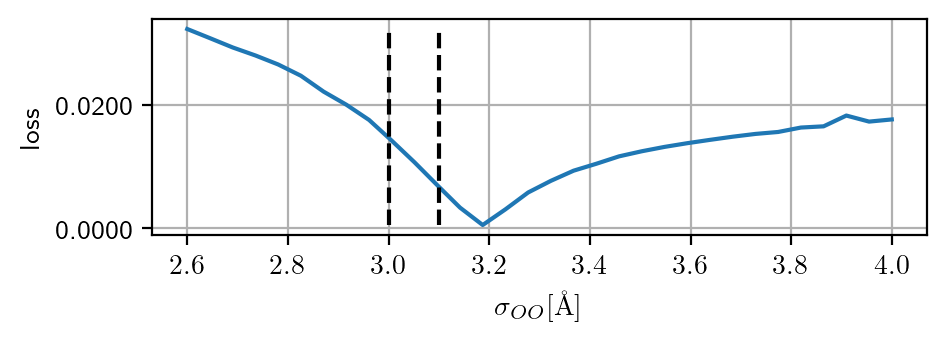

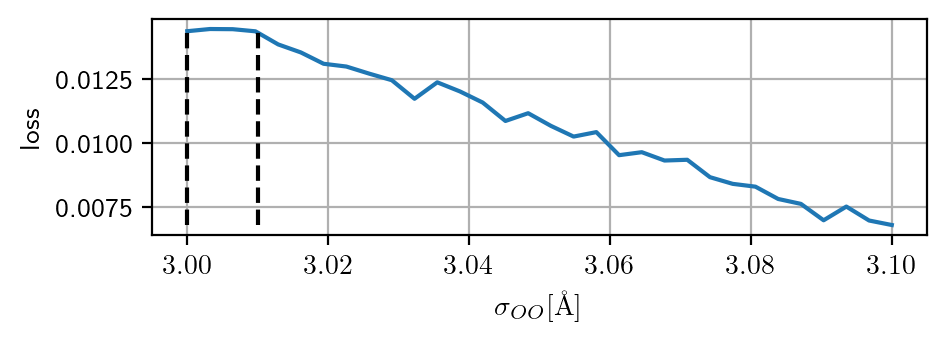

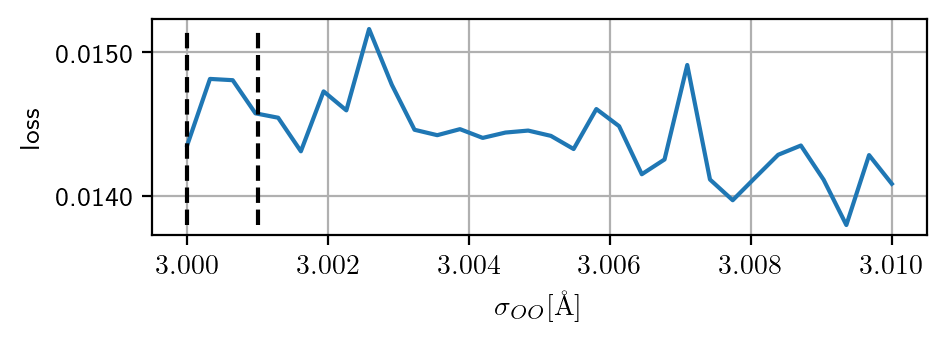

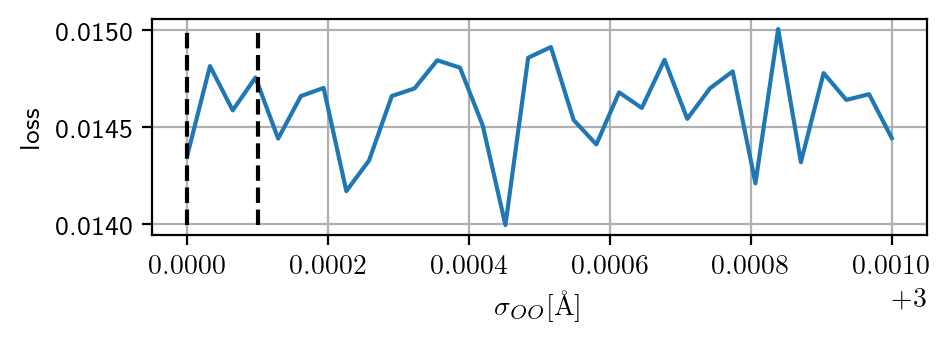

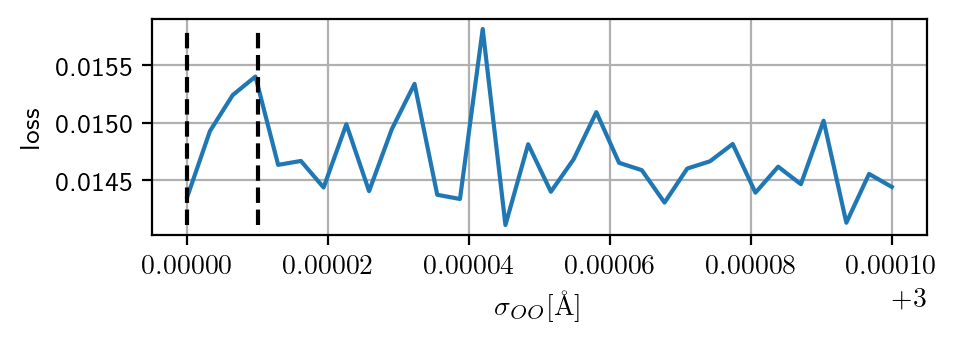

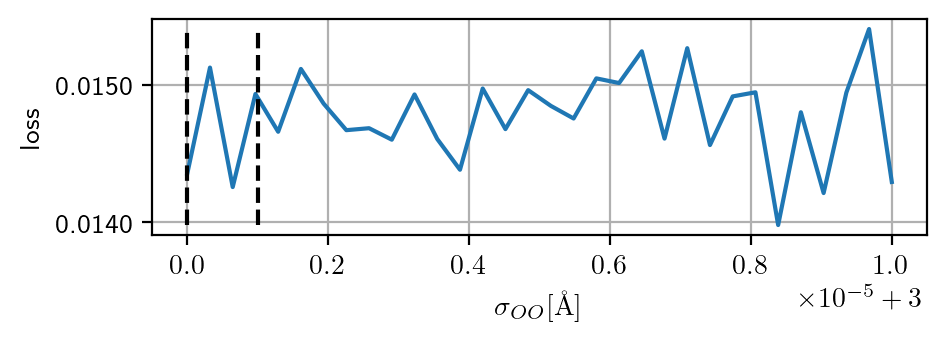

In [29]:
plot_losses(losses1, scan_space_1)
plot_losses(losses2, scan_space_2)
plot_losses(losses3, scan_space_3)
plot_losses(losses4, scan_space_4)
plot_losses(losses5, scan_space_5)
plot_losses(losses6, scan_space_6)